In [2]:
!pip install -q --upgrade seaborn

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the train dataset
train = pd.read_csv('Train.csv', parse_dates=['disbursement_date','due_date'])
test = pd.read_csv('Test.csv', parse_dates=['disbursement_date','due_date'])
economy = pd.read_csv('economic_indicators.csv')
print(f"Train Shape: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test Shape: {test.shape[0]} rows and {test.shape[1]} columns")

Train Shape: 68654 rows and 16 columns
Test Shape: 18594 rows and 15 columns


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  int64         
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  int64         
 4   lender_id                    68654 non-null  int64         
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

In [8]:
test['target'] = -1
df = pd.concat([train, test], ignore_index=True).reset_index(drop=True)

In [9]:
df['New_versus_Repeat'].unique()

array(['Repeat Loan', 'New Loan'], dtype=object)

In [10]:
df['duration'] = (df['duration']/7).round(0).astype('int64')
# df['duration'] = df['duration'].astype('category')

col_to_int = ['Total_Amount','Total_Amount_to_Repay', 'Amount_Funded_By_Lender','Lender_portion_to_be_repaid']
df[col_to_int] = df[col_to_int].round(0).astype('int64')


## Features creation.

In [ ]:
df['loan_interest'] = df['Total_Amount_to_Repay'] - df['Total_Amount']
df['lender_interest'] = df['Lender_portion_to_be_repaid'] - df['Amount_Funded_By_Lender']
df['year'] = df['disbursement_date'].dt.year
df['interest_diff'] = df['loan_interest'] - df['lender_interest']


# def create_status(df):
#     # lend_int, loan_interest = df['lender_interest'], df['loan_interest']

#     df.loc[(df['lender_interest']-df['loan_interest']) > 0.01,'interest_status'] = 'overcharged'
#     df.loc[(df['lender_interest']-df['loan_interest']) < -0.01,'interest_status'] = 'undercharged'
#     # df.loc[((df['lender_interest']-df['loan_interest']) < 0.02) & ((df['lender_interest']-df['loan_interest']) > -0.02) ,'interest_status'] = 'normal'

#     return df


# df1 = create_status(df)

# customers = df['customer_id'].unique()
# df1 = []
# for customer in customers:
#     data = df[df['customer_id'] == customer].sort_values(['loan_type', 'disbursement_date'])
#     data['numloan'] = 1
#     maping = dict(data.groupby('loan_type')['numloan'].cumsum())
#     break
# data





In [12]:
# df1.head()

In [13]:
# economy

In [14]:
# df1[df1['target'] == 1].sort_values(['customer_id', 'disbursement_date', 'New_versus_Repeat'])

In [15]:
# df[df['target'] == 0].sort_values(['customer_id', 'disbursement_date', 'New_versus_Repeat'])

In [16]:
# df[df['customer_id']==259757].sort_values(['disbursement_date', 'tbl_loan_id'])['lender_interest'].max()
# df[(df['loan_type']=='Type_1') & (df['lender_interest']>0.1) & (df['lender_interest']==df['interest'])]#['target'].value_counts()
# df[(df['loan_type']=='Type_1') & (df['interest']<0.4) & (
#     df['lender_interest']>df['interest']) & (df['New_versus_Repeat']!='Repeat Loan')]#['target'].value_counts()

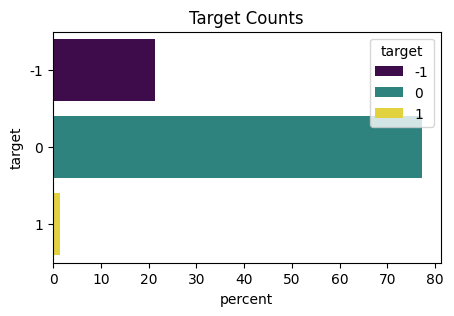

In [17]:

plt.figure(figsize=(5,3))
sns.countplot(df, y='target', hue='target', palette='viridis', stat='percent')
plt.title('Target Counts')
plt.show()

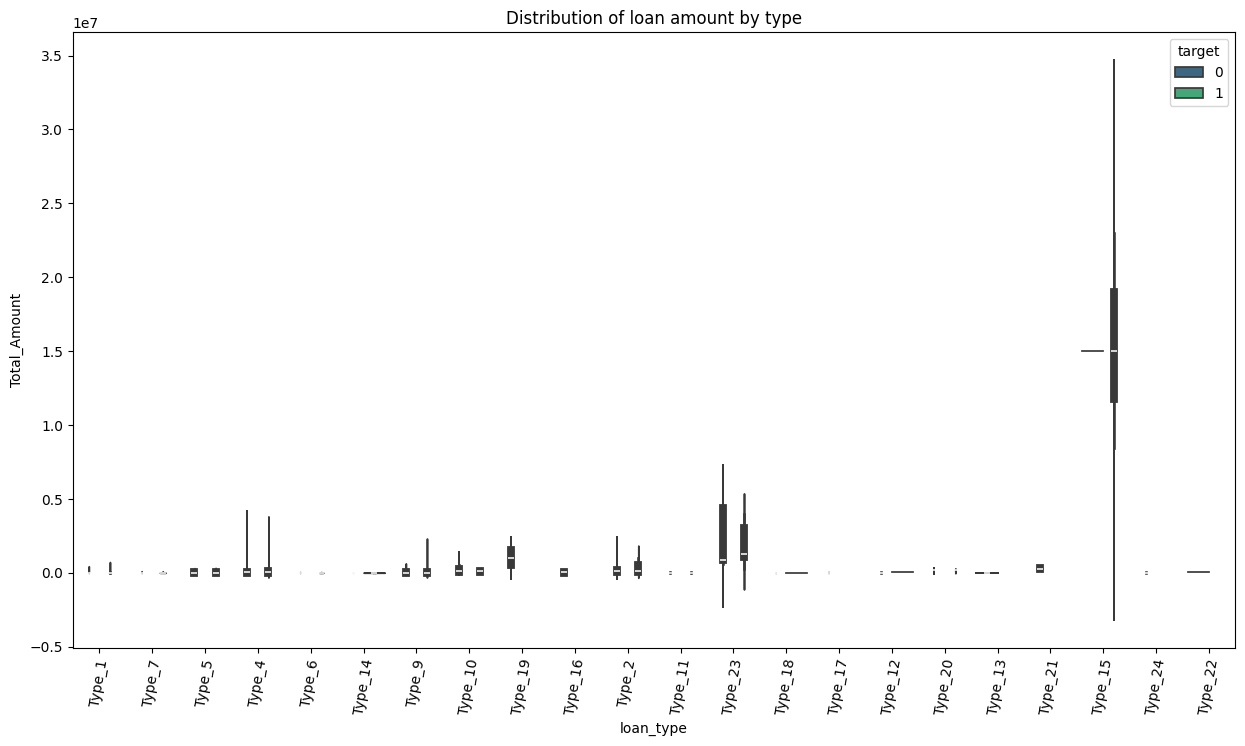

In [15]:
plt.figure(figsize=(15,8))
sns.violinplot(train, x='loan_type', y='Total_Amount', palette='viridis', hue='target')
plt.title('Distribution of loan amount by type')
plt.xticks(rotation=80)
plt.show()


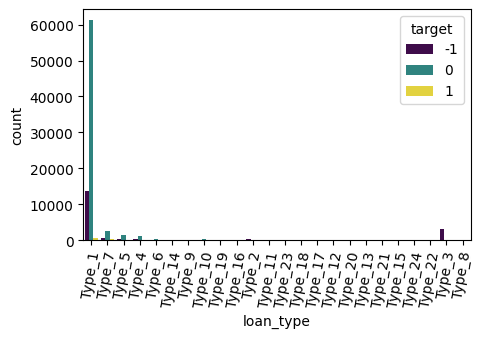

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(df, x='loan_type', hue='target', palette='viridis')
plt.xticks(rotation=80)
plt.show()

In [17]:
# df1[df1['loan_type'] == 'Type_15']

In [18]:
train.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [19]:
# fis,axs = plt.subplots(df['loan_type'].nunique()/2,2
# sns.catplot(train, y='lender_id', row='loan_type', hue='target',
#             col='duration', palette='viridis', kind='count', sharey=False)
# plt.title('Distribution of loan by country')
# plt.show()

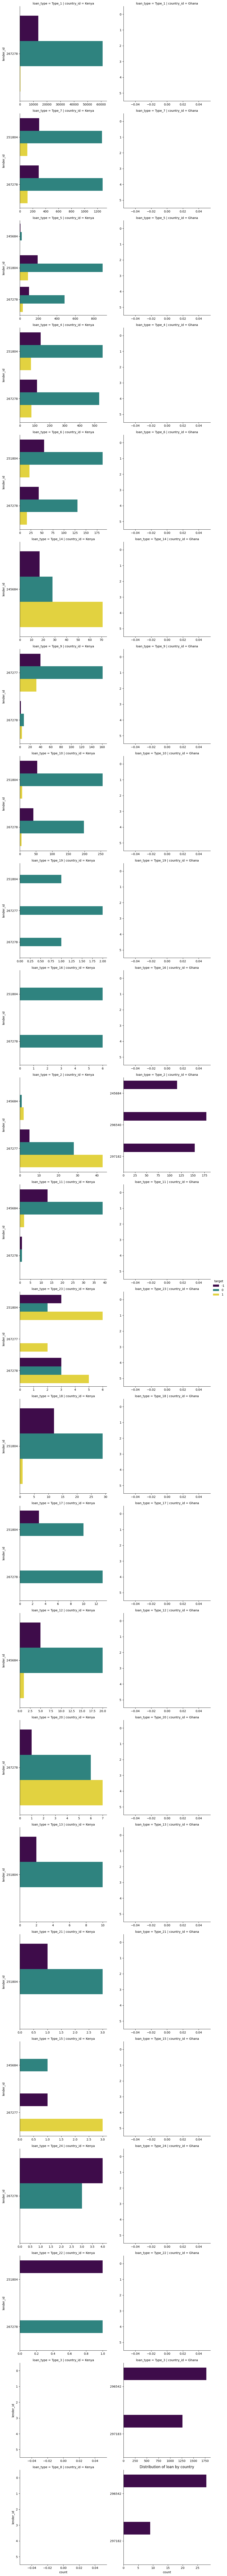

In [20]:
# fis,axs = plt.subplots(df['loan_type'].nunique()/2,2
sns.catplot(df, col='country_id', y='lender_id', row='loan_type', hue='target',
            palette='viridis', kind='count', sharey=False, sharex=False, estimator='sum')
plt.title('Distribution of loan by country')
plt.show()

In [18]:
df['Total_Amount'].min(), df['Total_Amount'].max()

(np.int64(2), np.int64(23000000))

## preprocessing.


In [19]:
df.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target', 'loan_interest',
       'lender_interest', 'year', 'interest_diff'],
      dtype='object')

In [20]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler

ordinal = OrdinalEncoder(dtype='int')
onehot = OneHotEncoder(sparse_output=False, dtype='int')
cats = ['lender_id', 'loan_type', 'year']
for cat in cats:
    df[cat] = ordinal.fit_transform(df[[cat]])

todrop = ['disbursement_date', 'due_date', 'country_id', 'tbl_loan_id', 'New_versus_Repeat']
# df

In [21]:
df2 = df.drop(todrop, axis=1)
# df2['Lender_portion_Funded'] = df2['Lender_portion_Funded'].astype('float32')
# df2['lender_interest'] = df2['lender_interest'].astype('float32')
# df2['loan_interest'] = df2['loan_interest'].astype('float32')

df2['duration'] = df2['duration'].astype('int')
train = df2[df2['target'] != -1]
test = df2[df2['target'] == -1]
train.head()

,ID,customer_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,loan_interest,lender_interest,year,interest_diff
0,ID_266671248032267278,266671,3,0,8448,8448,1,121,0.014305,121,0,0,0,1,0
1,ID_248919228515267278,248919,3,0,25895,25979,1,7768,0.300000,7794,0,84,26,1,58
2,ID_308486370501251804,308486,1,21,6900,7142,1,1380,0.200000,1428,0,242,48,3,194
3,ID_266004285009267278,266004,3,0,8958,9233,1,2687,0.300000,2770,0,275,83,1,192
4,ID_253803305312267278,253803,3,0,4564,4728,1,1369,0.300000,1418,0,164,49,1,115


In [22]:
# train.info()

## Modelling

In [23]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

import lightgbm as lgb
import shap


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel_launcher

AttributeError: _ARRAY_API not found

Train F1 Score; 0.9962825278810409
Train ROC AUC Score; 0.9999994020872943
Validation F1 Score; 0.8
Validation ROC AUC Score; 0.8966252059610715


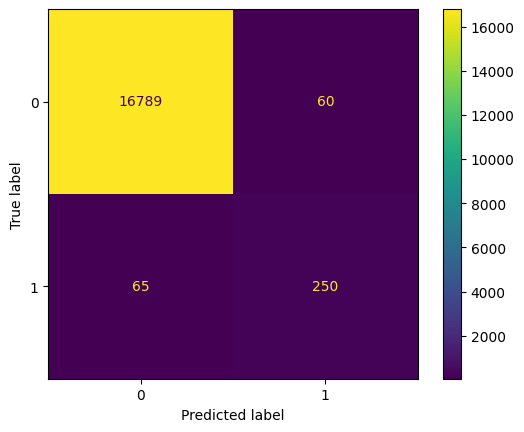

In [56]:

drop = ["ID", 'customer_id', 'target', 'lender_id', 'loan_type', 'Total_Amount_to_Repay',
        'Lender_portion_to_be_repaid', 'Amount_Funded_By_Lender',
        'interest_diff']
trainx, val = train_test_split(train, stratify=train['target'], random_state=23)
X_train = trainx.drop(drop, axis=1)
y_train = trainx.target
X_val = val.drop(drop, axis=1)
y_val = val.target

clf = tree.DecisionTreeClassifier(criterion='log_loss', random_state=23, #max_depth=9,
                                  #min_samples_leaf=2, #class_weight='balanced', 
                                  )
# clf = RandomForestClassifier(random_state=23, criterion='log_loss', class_weight='balanced',
#                              min_samples_leaf=2,)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(f"Train F1 Score; {f1_score(y_train, clf.predict(X_train), average='binary')}")
print(f"Train ROC AUC Score; {roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])}")

print(f"Validation F1 Score; {f1_score(y_val, y_pred, average='binary')}")
print(f"Validation ROC AUC Score; {roc_auc_score(y_val, clf.predict_proba(X_val)[:,1])}")

ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()


In [57]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16849
           1       0.81      0.79      0.80       315

    accuracy                           0.99     17164
   macro avg       0.90      0.90      0.90     17164
weighted avg       0.99      0.99      0.99     17164



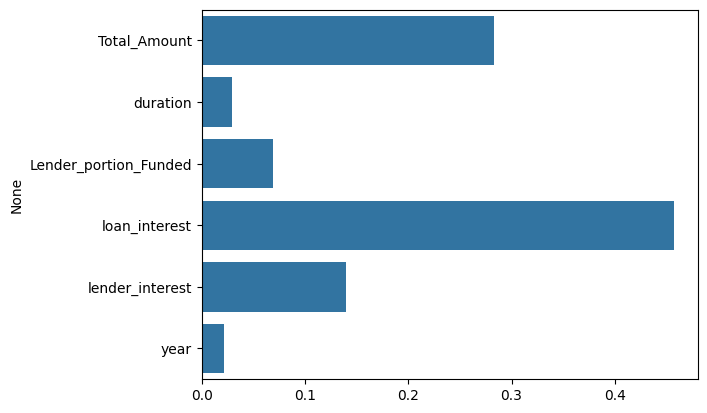

In [58]:
importances = clf.feature_importances_
sns.barplot(y=X_train.columns, x=importances)
plt.show()

In [ ]:
# tree.plot_tree(clf, feature_names=X_train.columns, label='all', fontsize=3)

### LGB Model.

[LightGBM] [Info] Number of positive: 943, number of negative: 50547
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 51490, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018314 -> initscore=-3.981593
[LightGBM] [Info] Start training from score -3.981593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

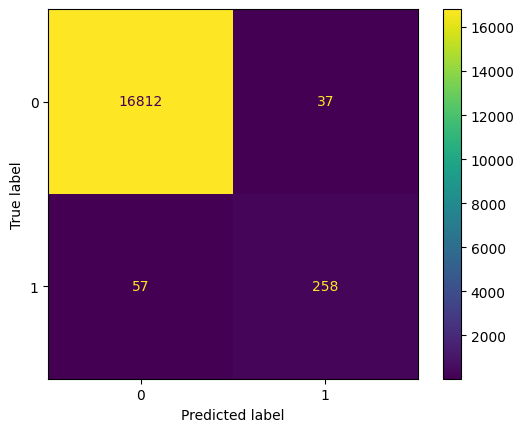

In [70]:
lgbclf = lgb.LGBMClassifier(random_state=23, force_col_wise=True, max_depth=11, n_estimators=500,
                            importance_type='gain', #early_stopping_rounds=100
                            )
lgbclf.fit(X_train, y_train, categorical_feature='from_dtype', eval_set=(X_val, y_val), eval_metric='F1',
           )

# make prediction and evaluate model.
y_pred = lgbclf.predict(X_val)

print(f"Train F1 Score; {f1_score(y_train, lgbclf.predict(X_train), average='binary')}")
print(f"Train ROC AUC Score; {roc_auc_score(y_train, lgbclf.predict_proba(X_train)[:,1])}")

print(f"Validation F1 Score; {f1_score(y_val, y_pred, average='binary')}")
print(f"Validation ROC AUC Score; {roc_auc_score(y_val, lgbclf.predict_proba(X_val)[:,1])}")

ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

In [71]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16849
           1       0.87      0.82      0.85       315

    accuracy                           0.99     17164
   macro avg       0.94      0.91      0.92     17164
weighted avg       0.99      0.99      0.99     17164



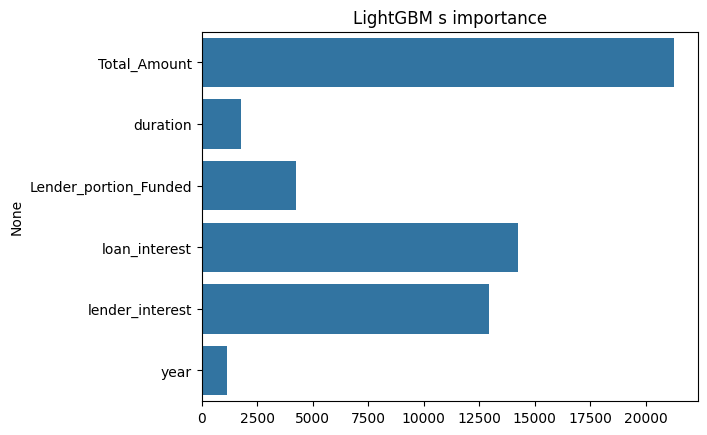

In [64]:
importances = lgbclf.feature_importances_
sns.barplot(y=X_train.columns, x=importances)
plt.title('LightGBM s importance')
plt.show()

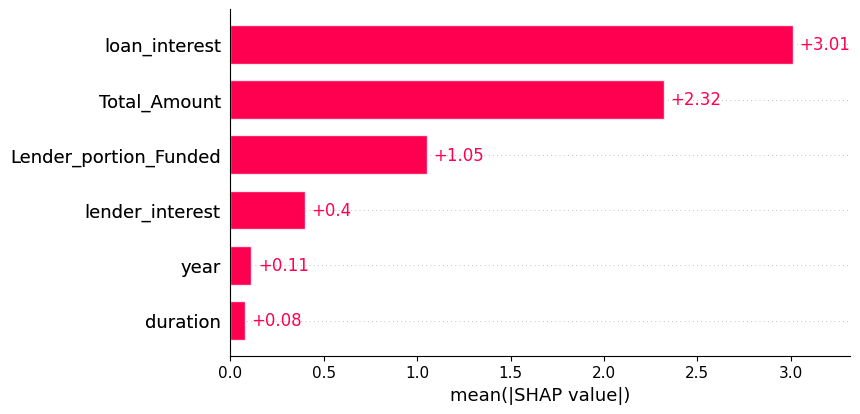

In [65]:
explainer = shap.Explainer(lgbclf)
shap_values = explainer(X_val)
# clust = shap.utils.hclust(X_val[:1000], y_val[:1000], linkage='single')

shap.plots.bar(shap_values, #clustering=clust, clustering_cutoff=1.0
               )

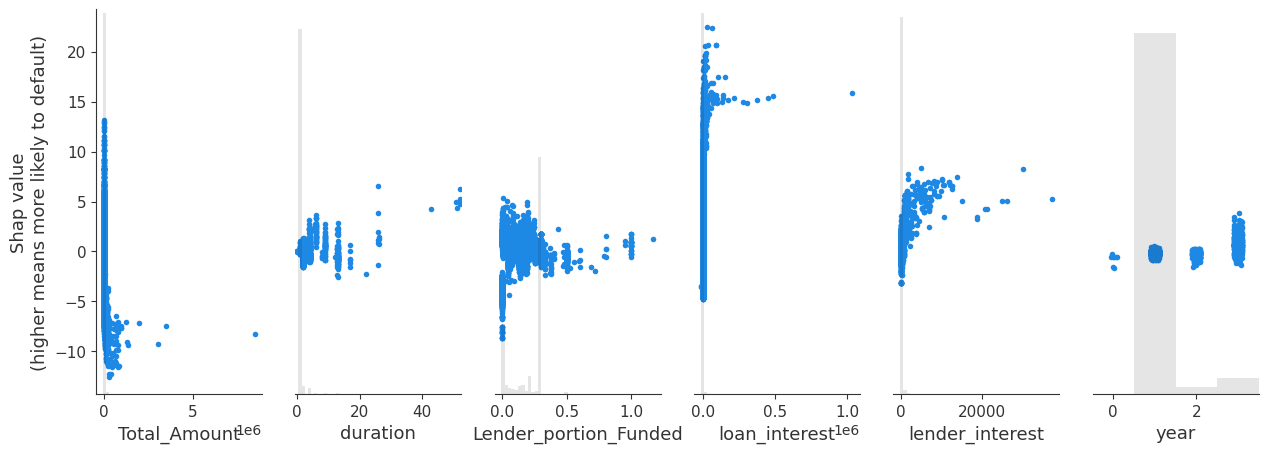

In [66]:
shap.plots.scatter(shap_values, ylabel="Shap value\n(higher means more likely to default)")

In [67]:
# shap.plots.heatmap(shap_values[:5000])